In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
google = pd.read_csv("/content/drive/MyDrive/fourth-sem/sem-LONG-project/google.csv")

In [ ]:
google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symbol       1258 non-null   object 
 1   date         1258 non-null   object 
 2   close        1258 non-null   float64
 3   high         1258 non-null   float64
 4   low          1258 non-null   float64
 5   open         1258 non-null   float64
 6   volume       1258 non-null   int64  
 7   adjClose     1258 non-null   float64
 8   adjHigh      1258 non-null   float64
 9   adjLow       1258 non-null   float64
 10  adjOpen      1258 non-null   float64
 11  adjVolume    1258 non-null   int64  
 12  divCash      1258 non-null   float64
 13  splitFactor  1258 non-null   float64
dtypes: float64(10), int64(2), object(2)
memory usage: 137.7+ KB


In [ ]:
google.drop('symbol' , axis = 1 , inplace = True)

In [ ]:
google2 = google.reset_index()['close']

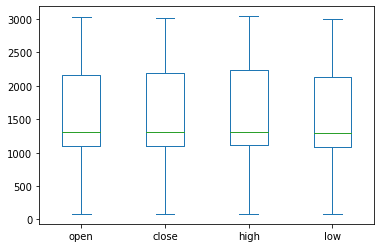

In [ ]:
google[['open' , 'close' , 'high' , 'low']].plot(kind='box');

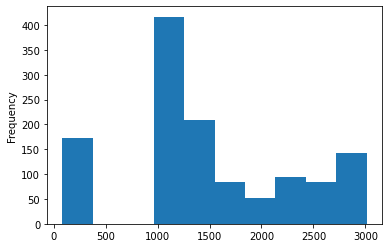

In [ ]:
google['close'].plot(kind = 'hist');

In [ ]:
import plotly.graph_objs as go
google['date'] = pd.to_datetime(google['date'])

In [ ]:
layout = go.Layout(title = 'STOCK-PRICE of GOOGLE',
                   xaxis = dict(title = 'DATE' , 
                                titlefont = dict(family = 'Serif , Sans-serif' , color = '#000000' , 
                                                 size = 18)),
                   yaxis = dict(title = 'PRICE' , 
                                titlefont = dict(family = 'Serif , Sans-serif' , color = '#FF0000' , 
                                                 size = 18)))
google_data = [{'x':google['date'] , 'y':google['close']}]
plot1 = go.Figure(data = google_data , layout = layout)

In [ ]:
from plotly.offline import iplot , plot , download_plotlyjs , init_notebook_mode

In [ ]:
iplot(plot1)

In [ ]:
from keras.models import Sequential 
from keras.layers import Dense, LSTM , Dropout

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
google2 = sc.fit_transform(np.array(google2).reshape(-1,1))

In [ ]:
training_size = int(len(google2)*0.65)
test_size = len(google2) - training_size
train_data , test_data = google2[:training_size] , google2[training_size:len(google2)]

In [ ]:
len(train_data)

817

In [ ]:
def dataset_creator(dataset , time_step = 1):
  X_data , y_data = [] , []
  for i in range(len(dataset) - time_step - 1):
    a = dataset[i:i+time_step , 0]
    X_data.append(a)
    y_data.append(dataset[i+time_step , 0])
  return np.array(X_data) , np.array(y_data)


In [ ]:
time_step = 100
X_train , y_train = dataset_creator(train_data , time_step)
X_test , y_test = dataset_creator(test_data , time_step)

In [ ]:
X_train = X_train.reshape(X_train.shape[0] , X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0] , X_test.shape[1] , 1)

In [ ]:
#LONG SHORT TERM MEMORY
np.random.seed(42)
model = Sequential()
model.add(LSTM(units = 50 , return_sequences = True , input_shape = (100,1)))
model.add(LSTM(units = 50, return_sequences=True))
model.add(LSTM(units = 50))
model.add(Dense(1))
model.compile(optimizer = 'adam' , loss = 'mean_squared_error')

In [ ]:
np.random.seed(42)
hist = model.fit(X_train , y_train , epochs = 100 , batch_size = 64 , verbose = 1)

Epoch 1/100
12/12 [==============================] - 18s 22ms/step - loss: 0.0473
Epoch 2/100
12/12 [==============================] - 0s 13ms/step - loss: 0.0091
Epoch 3/100
12/12 [==============================] - 0s 12ms/step - loss: 0.0042
Epoch 4/100
12/12 [==============================] - 0s 12ms/step - loss: 0.0023
Epoch 5/100
12/12 [==============================] - 0s 12ms/step - loss: 0.0015
Epoch 6/100
12/12 [==============================] - 0s 13ms/step - loss: 9.7258e-04
Epoch 7/100
12/12 [==============================] - 0s 15ms/step - loss: 6.9457e-04
Epoch 8/100
12/12 [==============================] - 0s 19ms/step - loss: 6.1676e-04
Epoch 9/100
12/12 [==============================] - 0s 17ms/step - loss: 5.7908e-04
Epoch 10/100
12/12 [==============================] - 0s 18ms/step - loss: 5.7994e-04
Epoch 11/100
12/12 [==============================] - 0s 18ms/step - loss: 5.6639e-04
Epoch 12/100
12/12 [==============================] - 0s 18ms/step - loss: 5.6633e

In [ ]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

11/11 [==============================] - 0s 8ms/step


In [ ]:
train_predict = sc.inverse_transform(train_predict)
test_predict = sc.inverse_transform(test_predict)


In [ ]:
import math
from sklearn.metrics import mean_squared_error

In [ ]:
math.sqrt(mean_squared_error(y_train , train_predict))

1492.2100360051318

In [ ]:
test_predict

array([[3009.2954 ],
       [3010.161  ],
       [3009.827  ],
       [3008.5469 ],
       [3006.5881 ],
       [3005.6904 ],
       [3005.4646 ],
       [3003.087  ],
       [2997.8596 ],
       [2990.111  ],
       [2977.17   ],
       [2962.8672 ],
       [2945.8838 ],
       [2926.693  ],
       [2908.7224 ],
       [2892.6514 ],
       [2880.573  ],
       [2876.9297 ],
       [2882.636  ],
       [2895.9265 ],
       [2915.0042 ],
       [2935.6296 ],
       [2953.6733 ],
       [2969.4902 ],
       [2980.4    ],
       [2984.2288 ],
       [2980.9905 ],
       [2973.6833 ],
       [2966.7808 ],
       [2962.282  ],
       [2961.6956 ],
       [2963.4683 ],
       [2966.7173 ],
       [2970.1582 ],
       [2971.9053 ],
       [2971.8591 ],
       [2969.5918 ],
       [2959.4106 ],
       [2941.4407 ],
       [2917.2014 ],
       [2890.8547 ],
       [2866.706  ],
       [2848.5562 ],
       [2835.4863 ],
       [2827.7888 ],
       [2821.9119 ],
       [2816.2244 ],
       [2808.

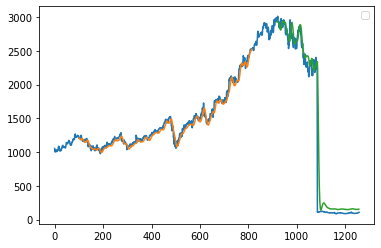

In [ ]:
past_days = 100

plot_train = np.empty_like(google2)
plot_train[:,:] = np.nan
plot_train[past_days:len(train_predict)+past_days , :] = train_predict

plot_test = np.empty_like(google2)
plot_test[:,:] = np.nan
plot_test[len(train_predict) + (past_days*2) + 1:len(google2) - 1 , :] = test_predict

plt.plot(sc.inverse_transform(google2))
plt.plot(plot_train)
plt.plot(plot_test)
plt.legend()
plt.show()

In [ ]:
import pickle

In [ ]:
pickle.dump(model , open("google_predictor.pkl" , 'wb'))

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......dense
.........vars
............0
............1
......lstm
.........cell
............vars
...............0
...............1
...............2
.........vars
......lstm_1
.........cell
............vars
...............0
...............1
...............2
.........vars
......lstm_2
.........cell
............vars
...............0
...............1
...............2
.........vars
...metrics
......mean
.........vars
............0
............1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........17
.........18
.........19
.........2
.........20
.........21
.........22
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                                             Modified             Size
metadata.json                                  2023-03-26 09:15:56         